# Human in the Loop Example 01

In [60]:
from typing import TypedDict, Annotated
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, SystemMessage 
from IPython.display import display, Markdown
from dotenv import load_dotenv


load_dotenv()

llm = ChatGroq(model="llama3-70b-8192") 

In [61]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

### Create all the nodes

In [62]:
GENERATE_POST = "generate_post"
POST = "post"
GET_REVIEW_DECISION = "get_review_decision"
COLLECT_FEEDBACK = "collect_feedback"

sys_msg="Output only the response. Do not add a prefix or suffix description to the output, output your response in markdown format"
system_message=SystemMessage(content=sys_msg)

def generate_post(state:AgentState)->AgentState:
    return {
        # "messages":[system_message, llm.invoke(state['messages'])]
        "messages":[system_message, llm.invoke(state['messages']+[sys_msg])]
    }

def get_review_decision(state:AgentState)->str:
    post_content = state['messages'][-1].content

    print(f"\n Current LinkedIn Post\n{post_content}\n")

    decision = input("Post to LinkedIn (yes/no): ")

    if(decision.lower()=="yes"):
        return "post"
    return "feedback"

def post(state:AgentState):
    final_post = state['messages'][-1].content

    display(Markdown("## Final Output"))
    display(Markdown(f"{final_post}"))
    # print(f"\nFinal LinkedIn Post\n {final_post}")
    # print("\n Post have been approved and is now live on LinkedIn")



def collect_feedback(state:AgentState)->AgentState:
    feedback = input("How can I improve this post? ")
    return {
        "messages":[HumanMessage(content=feedback)]
    }

### Create The Graph Node and edges

In [63]:
graph = StateGraph(AgentState)

graph.add_node(GENERATE_POST, generate_post)
# graph.add_node(GET_REVIEW_DECISION, get_review_decision)
graph.add_node(COLLECT_FEEDBACK, collect_feedback)
graph.add_node(POST, post)

graph.set_entry_point(GENERATE_POST)
graph.add_conditional_edges(GENERATE_POST, 
                            get_review_decision,
                           {
                               "post":POST,
                               "feedback": COLLECT_FEEDBACK,
                           })
graph.add_edge(POST, END)
graph.add_edge(COLLECT_FEEDBACK, GENERATE_POST)

app = graph.compile() 

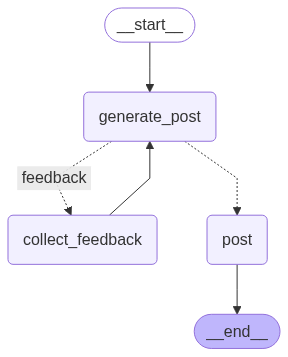

In [64]:
app

In [65]:
user_input = "Write a LinkedIn post abouton AI Agent taking over content creation"
response = app.invoke({
    "messages":[HumanMessage(content=user_input)]
})

#display a markdown of the final output
# from IPython.display import display, Markdown
# display(Markdown("## Final Output"))
# display(Markdown(response['messages'][-1].content))


 Current LinkedIn Post
The Future of Content Creation: AI Agents Take the Reins

As I reflect on the rapid advancements in artificial intelligence, I'm left wondering: are we on the cusp of a revolution in content creation? The answer, in my opinion, is a resounding yes.

AI agents are increasingly capable of producing high-quality content that rivals human creation. From blog posts to social media updates, these intelligent machines are learning to craft compelling narratives, optimized for engagement and conversion.

The implications are profound. With AI agents taking over content creation, businesses can:

* **Scale content production**: Meet the insatiable demand for fresh, relevant content without breaking the bank or exhausting human resources.
* **Personalize at scale**: AI agents can tailor content to individual preferences, interests, and behaviors, driving deeper connections with audiences.
* **Optimize for ROI**: AI-driven content can be continuously refined and improved b

Post to LinkedIn (yes/no):  no
How can I improve this post?  add content about earnings



 Current LinkedIn Post
The Future of Content Creation: AI Agents Take the Reins

As I reflect on the rapid advancements in artificial intelligence, I'm left wondering: are we on the cusp of a revolution in content creation? The answer, in my opinion, is a resounding yes.

AI agents are increasingly capable of producing high-quality content that rivals human creation. From blog posts to social media updates, these intelligent machines are learning to craft compelling narratives, optimized for engagement and conversion.

The implications are profound. With AI agents taking over content creation, businesses can:

* **Scale content production**: Meet the insatiable demand for fresh, relevant content without breaking the bank or exhausting human resources.
* **Personalize at scale**: AI agents can tailor content to individual preferences, interests, and behaviors, driving deeper connections with audiences.
* **Optimize for ROI**: AI-driven content can be continuously refined and improved b

Post to LinkedIn (yes/no):  yes


## Final Output

The Future of Content Creation: AI Agents Take the Reins
=====================================================

As I reflect on the rapid advancements in artificial intelligence, I'm left wondering: are we on the cusp of a revolution in content creation? The answer, in my opinion, is a resounding yes.

AI agents are increasingly capable of producing high-quality content that rivals human creation. From blog posts to social media updates, these intelligent machines are learning to craft compelling narratives, optimized for engagement and conversion.

The implications are profound. With AI agents taking over content creation, businesses can:

* **Scale content production**: Meet the insatiable demand for fresh, relevant content without breaking the bank or exhausting human resources.
* **Personalize at scale**: AI agents can tailor content to individual preferences, interests, and behaviors, driving deeper connections with audiences.
* **Optimize for ROI**: AI-driven content can be continuously refined and improved based on performance data, ensuring maximum return on investment.

But what does this mean for human content creators? Will we be replaced by machines? I don't think so. AI agents will augment our capabilities, freeing us to focus on high-level strategy, creativity, and emotional intelligence – the aspects of content creation that machines can't replicate.

And let's not forget about the earning potential. With AI agents taking over the more mundane tasks, human content creators can focus on high-value tasks that command higher earnings. Imagine being able to:

* **Command higher rates**: With AI handling the grunt work, human content creators can charge premium rates for their expertise and creative vision.
* **Increase productivity**: By automating repetitive tasks, human content creators can take on more projects, leading to increased earnings and faster career advancement.
* **Develop new revenue streams**: As AI agents take over content creation, human content creators can explore new revenue streams, such as AI training and consulting, or even creating their own AI-powered content tools.

The future of content creation is a collaboration between humans and AI agents. It's an exciting time, full of opportunities and challenges. Let's harness the power of AI to elevate our craft, increase our earnings, and create content that truly resonates with our audiences.

What are your thoughts on AI-powered content creation? Share your insights and concerns in the comments below!

#AI #ContentCreation #FutureOfWork #MarketingInnovation

In [66]:
response

{'messages': [HumanMessage(content='Write a LinkedIn post abouton AI Agent taking over content creation', additional_kwargs={}, response_metadata={}, id='b91b558d-0c97-4ddd-9dbe-2f86e07e6232'),
  SystemMessage(content='Output only the response. Do not add a prefix or suffix description to the output, output your response in markdown format', additional_kwargs={}, response_metadata={}, id='1db8adc5-52e5-423b-9056-94a4036eb7e1'),
  AIMessage(content="The Future of Content Creation: AI Agents Take the Reins\n=====================================================\n\nAs I reflect on the rapid advancements in artificial intelligence, I'm left wondering: are we on the cusp of a revolution in content creation? The answer, in my opinion, is a resounding yes.\n\nAI agents are increasingly capable of producing high-quality content that rivals human creation. From blog posts to social media updates, these intelligent machines are learning to craft compelling narratives, optimized for engagement and